In [1]:
%load_ext zipline

In [ ]:
QUANDL_API_KEY=drKP7Eky8mCEfQ_VRTTt zipline ingest -b quantopian-quandl

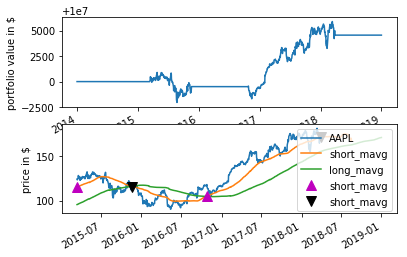

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.001407,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.002812,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.004215,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.005616,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.007016,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.008413,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.009808,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.011201,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.012593,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.013982,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [20]:
%%zipline --start 2014-1-1 --end 2019-1-1 -o dma.pickle


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

In [ ]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

/anaconda3/lib/python3.6/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/anaconda3/lib/python3.6/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,


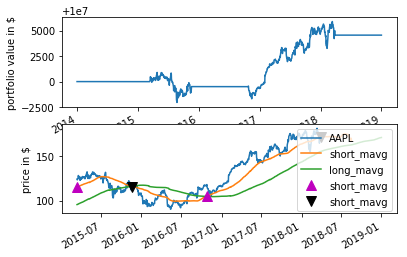

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.001407,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.002812,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.004215,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.005616,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.007016,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.008413,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.009808,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.011201,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.012593,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.013982,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [19]:
%%zipline --start 2014-1-1 --end 2019-1-1 -o dma.pickle


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

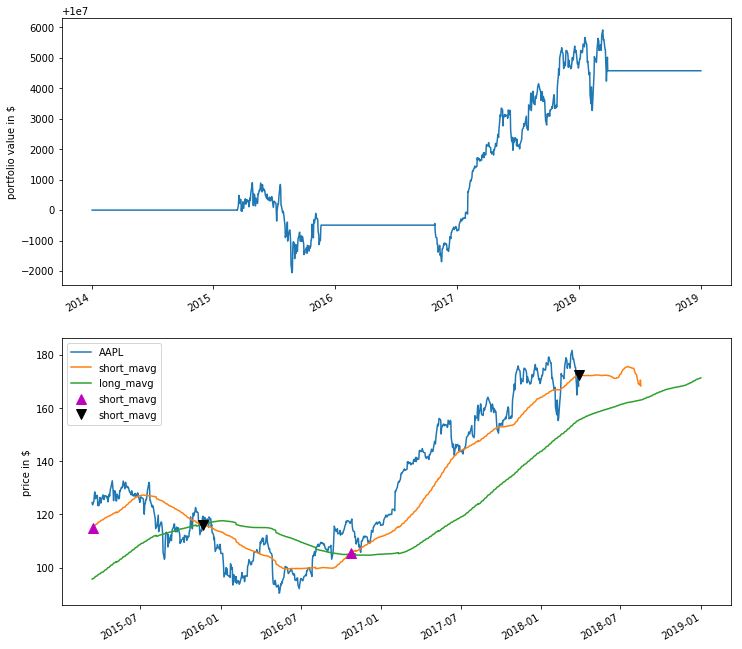

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.001407,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.002812,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2014-01-06 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.004215,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2014-01-07 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.005616,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2014-01-08 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.007016,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2014-01-09 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.008413,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2014-01-10 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.009808,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2014-01-13 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.011201,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2014-01-14 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.012593,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2014-01-15 21:00:00+00:00,NaN,0.000000,0.000000,NaN,-0.013982,0.000000,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [3]:
%%zipline --start 2014-1-1 --end 2019-1-1 -o dma.pickle
from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt
def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

[2019-05-01 02:23:21.297225] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2019-05-01 02:19:39.533103+00:00.
[2019-05-01 02:23:22.378413] INFO: Performance: after split: asset: Equity(8 [AAPL]), amount: 700, cost_basis: 81.71, last_sale_price: 645.57
[2019-05-01 02:23:22.379115] INFO: Performance: returning cash: 0.0
[2019-05-01 02:23:25.904287] INFO: zipline.finance.metrics.tracker: Simulated 1007 trading days
first open: 2014-01-02 14:31:00+00:00
last close: 2017-12-29 21:00:00+00:00


,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,buy,capital_used,ending_cash,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2014-01-02 21:00:00+00:00,553.130,NaN,0.000000e+00,NaN,-0.001407,NaN,NaN,True,0.0,1.000000e+07,...,0.0,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2014-01-03 21:00:00+00:00,540.980,0.000001,-1.000000e-07,NaN,-0.002812,0.000000,NaN,False,-54099.0,9.945901e+06,...,0.0,0.0,0,-11.224972,1.000000e+07,0.0,0.0,2,"[{'amount': 100, 'dt': 2014-01-03 21:00:00+00:...",0.0
2014-01-06 21:00:00+00:00,543.930,0.000271,2.940000e-05,NaN,-0.004215,0.000000,NaN,False,0.0,9.945901e+06,...,0.0,0.0,0,2694.554033,9.945901e+06,54098.0,54098.0,3,[],0.0
2014-01-07 21:00:00+00:00,540.037,0.000446,-9.530000e-06,NaN,-0.005616,0.000000,NaN,False,0.0,9.945901e+06,...,0.0,0.0,0,-1.942843,9.945901e+06,54393.0,54393.0,4,[],0.0
2014-01-08 21:00:00+00:00,543.460,0.000465,2.470000e-05,NaN,-0.007016,0.000000,NaN,False,0.0,9.945901e+06,...,0.0,0.0,0,4.504692,9.945901e+06,54003.7,54003.7,5,[],0.0
2014-01-09 21:00:00+00:00,536.519,0.000637,-4.471000e-05,NaN,-0.008413,0.000000,NaN,False,0.0,9.945901e+06,...,0.0,0.0,0,-3.640780,9.945901e+06,54346.0,54346.0,6,[],0.0
2014-01-10 21:00:00+00:00,532.940,0.000606,-8.050000e-05,NaN,-0.009808,0.000000,NaN,False,0.0,9.945901e+06,...,0.0,0.0,0,-5.535180,9.945901e+06,53651.9,53651.9,7,[],0.0
2014-01-13 21:00:00+00:00,535.730,0.000603,-5.260000e-05,NaN,-0.011201,0.000000,NaN,False,0.0,9.945901e+06,...,0.0,0.0,0,-3.383004,9.945901e+06,53294.0,53294.0,8,[],0.0
2014-01-14 21:00:00+00:00,546.390,0.000822,5.390000e-05,NaN,-0.012593,0.000000,NaN,False,54638.0,1.000054e+07,...,0.0,0.0,0,3.269166,9.945901e+06,53573.0,53573.0,9,"[{'amount': -100, 'dt': 2014-01-14 21:00:00+00...",0.0
2014-01-15 21:00:00+00:00,557.360,0.000776,5.390000e-05,NaN,-0.013982,0.000000,NaN,False,0.0,1.000054e+07,...,0.0,0.0,0,3.101403,1.000054e+07,0.0,0.0,10,[],0.0


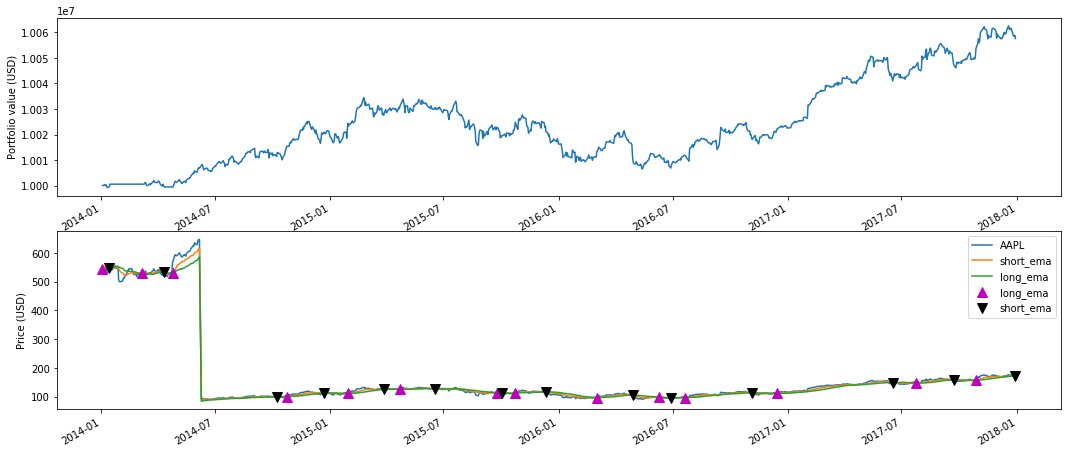

In [46]:
%%zipline --start 2014-1-1 --end 2018-1-1

from zipline.api import order, record, symbol
from zipline.finance import commission, slippage
# Import exponential moving average from talib wrapper
from talib import EMA


def initialize(context):
    context.asset = symbol('AAPL')

    # To keep track of whether we invested in the stock or not
    context.invested = False

    # Explicitly set the commission/slippage to the "old" value until we can
    # rebuild example data.
    # github.com/quantopian/zipline/blob/master/tests/resources/
    # rebuild_example_data#L105
    context.set_commission(commission.PerShare(cost=.0075, min_trade_cost=1.0))
    context.set_slippage(slippage.VolumeShareSlippage())


def handle_data(context, data):
    trailing_window = data.history(context.asset, 'price', 40, '1d')
    if trailing_window.isnull().values.any():
        return
    short_ema = EMA(trailing_window.values, timeperiod=20)
    long_ema = EMA(trailing_window.values, timeperiod=40)

    buy = False
    sell = False

    if (short_ema[-1] > long_ema[-1]) and not context.invested:
        order(context.asset, 100)
        context.invested = True
        buy = True
    elif (short_ema[-1] < long_ema[-1]) and context.invested:
        order(context.asset, -100)
        context.invested = False
        sell = True

    record(AAPL=data.current(context.asset, "price"),
           short_ema=short_ema[-1],
           long_ema=long_ema[-1],
           buy=buy,
           sell=sell)


# Note: this function can be removed if running
# this algorithm on quantopian.com
def analyze(context=None, results=None):
    import matplotlib.pyplot as plt
    import logbook
    logbook.StderrHandler().push_application()
    log = logbook.Logger('Algorithm')

    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    results.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Portfolio value (USD)')

    ax2 = fig.add_subplot(212)
    ax2.set_ylabel('Price (USD)')

    # If data has been record()ed, then plot it.
    # Otherwise, log the fact that no data has been recorded.
    if 'AAPL' in results and 'short_ema' in results and 'long_ema' in results:
        results[['AAPL', 'short_ema', 'long_ema']].plot(ax=ax2)

        ax2.plot(
            results.index[results.buy],
            results.loc[results.buy, 'long_ema'],
            '^',
            markersize=10,
            color='m',
        )
        ax2.plot(
            results.index[results.sell],
            results.loc[results.sell, 'short_ema'],
            'v',
            markersize=10,
            color='k',
        )
        plt.legend(loc=0)
        plt.gcf().set_size_inches(18, 8)
    else:
        msg = 'AAPL, short_ema and long_ema data not captured using record().'
        ax2.annotate(msg, xy=(0.1, 0.5))
        log.info(msg)
        plt.show()

def _test_args():
    
    import pandas as pd

    return {
        'start': pd.Timestamp('2014-01-01', tz='utc'),
        'end': pd.Timestamp('2018-01-01', tz='utc'),
    }


In [50]:
%%zipline --start 2013-1-1 --end 2018-1-1

from six import viewkeys
from zipline.api import (
    attach_pipeline,
    date_rules,
    order_target_percent,
    pipeline_output,
    record,
    schedule_function,
)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import RSI


def make_pipeline():
    rsi = RSI()
    return Pipeline(
        columns={
            'longs': rsi.top(3),
            'shorts': rsi.bottom(3),
        },
    )


def rebalance(context, data):

    # Pipeline data will be a dataframe with boolean columns named 'longs' and
    # 'shorts'.
    pipeline_data = context.pipeline_data
    all_assets = pipeline_data.index

    longs = all_assets[pipeline_data.longs]
    shorts = all_assets[pipeline_data.shorts]

    record(universe_size=len(all_assets))

    # Build a 2x-leveraged, equal-weight, long-short portfolio.
    one_third = 1.0 / 3.0
    for asset in longs:
        order_target_percent(asset, one_third)

    for asset in shorts:
        order_target_percent(asset, -one_third)

    # Remove any assets that should no longer be in our portfolio.
    portfolio_assets = longs | shorts
    positions = context.portfolio.positions
    for asset in viewkeys(positions) - set(portfolio_assets):
        # This will fail if the asset was removed from our portfolio because it
        # was delisted.
        if data.can_trade(asset):
            order_target_percent(asset, 0)


def initialize(context):
    attach_pipeline(make_pipeline(), 'my_pipeline')

    # Rebalance each day.  In daily mode, this is equivalent to putting
    # `rebalance` in our handle_data, but in minute mode, it's equivalent to
    # running at the start of the day each day.
    schedule_function(rebalance, date_rules.every_day())

    # Explicitly set the commission/slippage to the "old" value until we can
    # rebuild example data.
    # github.com/quantopian/zipline/blob/master/tests/resources/
    # rebuild_example_data#L105
    context.set_commission(commission.PerShare(cost=.0075, min_trade_cost=1.0))
    context.set_slippage(slippage.VolumeShareSlippage())


def before_trading_start(context, data):
    context.pipeline_data = pipeline_output('my_pipeline')


def _test_args():
    
#     Extra arguments to use when zipline's automated tests run this example.
#     Notes for testers:
#     Gross leverage should be roughly 2.0 on every day except the first.
#     Net leverage should be roughly 2.0 on every day except the first.
#     Longs Count should always be 3 after the first day.
#     Shorts Count should be 3 after the first day, except on 2013-10-30, when it
#     dips to 2 for a day because DELL is delisted.
    
    import pandas as pd

    return {
        # We run through october of 2013 because DELL is in the test data and
        # it went private on 2013-10-29.
        'start': pd.Timestamp('2013-01-01', tz='utc'),
        'end': pd.Timestamp('2018-01-01', tz='utc'),
        'capital_base': 100000,
    }

def analyze(context, perf):
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')
    plt.show()

[2019-05-01 02:26:59.086645] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2019-05-01 02:19:39.533103+00:00.
[2019-05-01 02:26:59.097086] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2019-05-01 02:19:40.609232+00:00.
[2019-05-01 02:27:52.064656] INFO: Performance: after split: asset: Equity(1657 [LDOS]), amount: -446334, cost_basis: 61.8, last_sale_price: 16.03
[2019-05-01 02:27:52.066119] INFO: Performance: returning cash: 0.0
[2019-05-01 02:29:08.676180] INFO: Performance: after split: asset: Equity(1536 [ITC]), amount: -1092660, cost_basis: 33.13, last_sale_price: 102.60000000000001
[2019-05-01 02:29:08.677294] INFO: Performance: returning cash: 0.0
[2019-05-01 02:29:26.884801] INFO: Performance: after split: asset: Equity(1494 [INSY]), amount: 475566, cost_basis: 44.67, last_sale_price: 61.19
[2019-05-01 02:29:26.885508] INFO: Performance: returning cash: 0.0
[2019-05-01 02:29:28.985514] INFO: Per

Abort: 